# 探索用户行为模式

<br>

## 一、项目背景

&emsp;&emsp;本文针对淘宝app的平台数据，通过相关指标对用户行为进行分析，从而探索用户相关行为模式。

&emsp;&emsp;该项目数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，用户数量10000。

#### 相关字段解释如下：

- user_id：用户身份
- item_id：商品ID
- behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
- user_geohash：地理位置
- item_category：品类ID（商品所属的品类）
- time：用户行为发生的时间


#### 分析方法：

- 日pv和日uv分析
- 付费率分析
- 复购行为分析
- 漏斗流失分析
- 用户价值RFM分析

## 二、理解数据

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import os
os.chdir(r'D:\Data Analysis\User Behavior Data')

In [6]:
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype=str)

In [7]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
dtypes: object(6)
memory usage: 561.1+ MB


In [8]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


## 三、数据处理

In [9]:
# 1.缺失值分析
data_user.apply(lambda x: sum(x.isnull())/len(x))

user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

- 地理位置缺失对分析影响不大，因此忽略

In [10]:
data_user['date'] = data_user['time'].str[0:10]
data_user['hour'] = data_user['time'].str[11:]

In [11]:
data_user.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [12]:
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time'] = pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype(int)

In [13]:
data_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                      int32
dtype: object

In [14]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [15]:
# 2.异常值分析
data_user.sort_values(by='time',ascending=True,inplace=True)

In [16]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
1505077,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
8686537,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
4035788,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
10113411,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
2936757,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [17]:
data_user.describe(include=['object'])

,user_id,item_id,behavior_type,user_geohash,item_category
count,12256906,12256906,12256906,3922082,12256906
unique,10000,2876947,4,575458,8916
top,36233277,112921337,1,94ek6ke,1863
freq,31030,1445,11550581,1052,393247


## 四、构建模型

#### 1. 日pv和日uv分析

In [18]:
pv_daily = data_user.groupby('date').count()['user_id']

In [19]:
pv_daily.head()

date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
Name: user_id, dtype: int64

In [20]:
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: x.drop_duplicates().count())

In [21]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)

In [22]:
pv_uv_daily.columns = ['pv','uv']

In [23]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [24]:
pv_uv_daily.corr(method='pearson')

,pv,uv
pv,1.000000,0.920602
uv,0.920602,1.000000


- 根据皮尔森相关系数说明访问量和访问用户数呈正相关关系

D:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


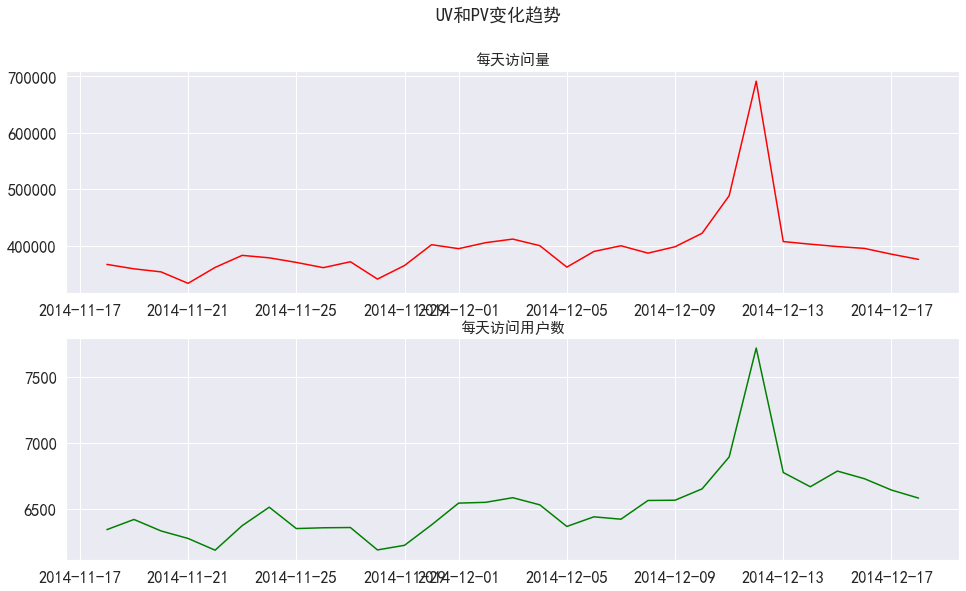

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(pv_daily,color='red')
plt.title('每天访问量',fontsize=15)
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('每天访问用户数',fontsize=15)
plt.suptitle('UV和PV变化趋势',fontsize=18)
plt.show()

In [26]:
pv_daily = data_user.groupby('hour').count()['user_id']

In [27]:
uv_daily = data_user.groupby('hour')['user_id'].apply(lambda x: x.drop_duplicates().count())

In [28]:
pv_uv_daily = pd.concat([pv_daily,uv_daily],axis=1)

In [29]:
pv_uv_daily.columns=['pv','uv']

In [30]:
pv_uv_daily.head()

,pv,uv
hour,,
0,517404,5786
1,267682,3780
2,147090,2532
3,98516,1937
4,80487,1765


In [31]:
pv_uv_daily.corr(method='spearman')

,pv,uv
pv,1.000000,0.903478
uv,0.903478,1.000000


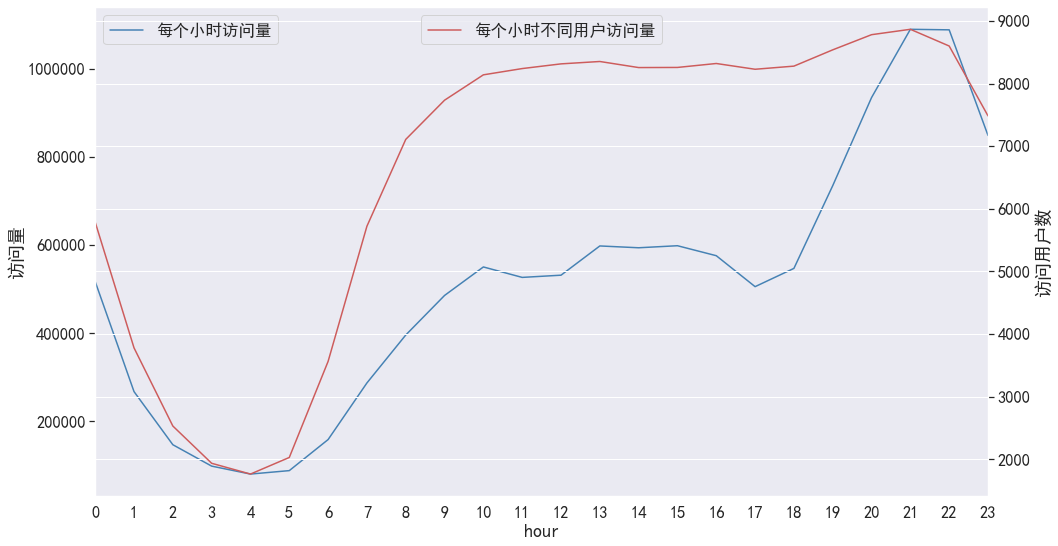

In [32]:
plt.figure(figsize=(16,9))
pv_uv_daily['pv'].plot(color='steelblue', label='每个小时访问量')
plt.ylabel('访问量')
plt.legend(loc='upper right')
pv_uv_daily['uv'].plot(color='indianred', label='每个小时不同用户访问量',secondary_y=True)
plt.ylabel('访问用户数')
plt.xticks(range(0,24),pv_uv_daily.index)
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

- 18点后是用户活跃时间段，用户数量变化不大，但是访问量大大增加；5点-10点也是用户访问增加的一个时间段

#### 2. 不同行为类型用户分析

In [33]:
pv_detail = pd.pivot_table(columns='behavior_type', index='hour', data=data_user, values='user_id', aggfunc=np.size)

In [34]:
pv_detail

behavior_type,1,2,3,4
hour,,,,
0,487341,11062,14156,4845
1,252991,6276,6712,1703
2,139139,3311,3834,806
3,93250,2282,2480,504
4,75832,2010,2248,397
5,83545,2062,2213,476
6,150356,3651,3768,1023
7,272470,5885,7044,1938
8,374701,7849,9970,3586


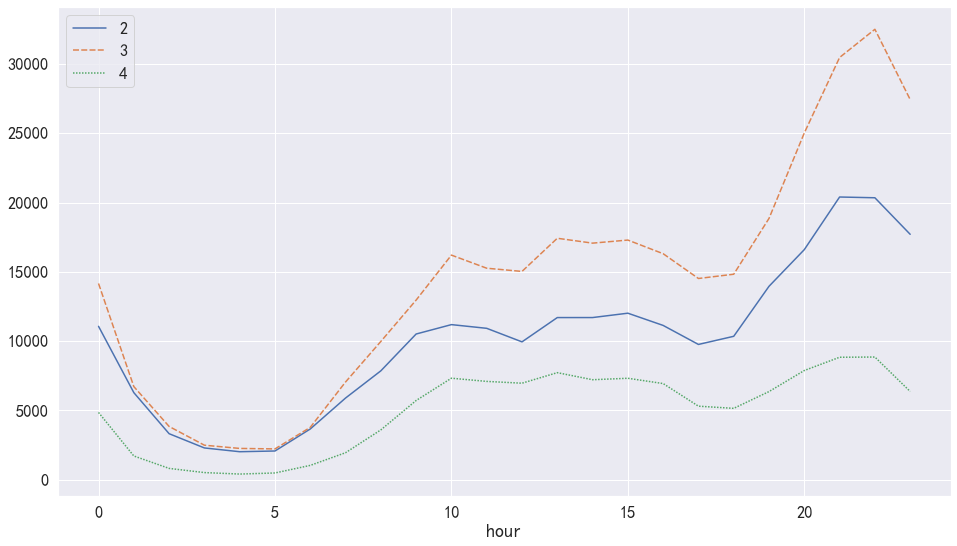

In [35]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pv_detail.iloc[:,1:])
plt.show()

- 加购物车的比较多，其次是收藏，购买人群最少

#### 3. 用户消费行为分析

In [36]:
# 消费用户访问次数
data_user_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').size()

In [37]:
data_user_buy.head()

user_id
100001878    36
100011562     3
100012968    15
100014060    24
100024529    26
dtype: int64

In [38]:
data_user_buy.describe()

count    8886.000000
mean       13.527459
std        19.698786
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       809.000000
dtype: float64

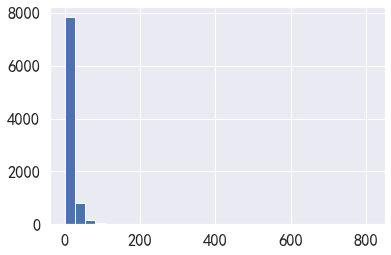

In [39]:
plt.hist(x=data_user_buy, bins=30)
plt.show()

In [40]:
# 1.日ARPPU 每付费用户平均消费金额 （用消费次数代替消费额度）
data_user_buy1 = data_user[data_user.behavior_type=='4'].groupby(['date','user_id']).count()['behavior_type'].reset_index().rename(columns={'behavior_type':'total'})

In [41]:
data_user_buy1.head()

,date,user_id,total
0,2014-11-18,100001878,1
1,2014-11-18,100014060,2
2,2014-11-18,100024529,6
3,2014-11-18,100027681,3
4,2014-11-18,10004287,2


In [42]:
# 每付费用户平均消费次数
data_user_buy2 = data_user_buy1.groupby('date').sum()['total'] / data_user_buy1.groupby('date').count()['total']

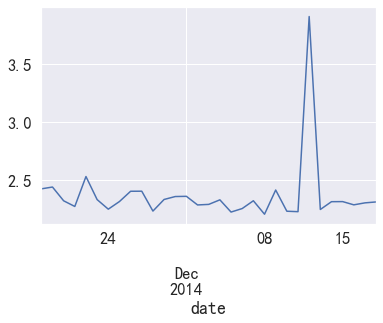

In [43]:
data_user_buy2.plot()
plt.show()

In [44]:
data_user_buy2.describe()

count    31.000000
mean      2.368446
std       0.296108
min       2.204384
25%       2.262436
50%       2.313460
75%       2.358159
max       3.913523
Name: total, dtype: float64

In [45]:
# 2.日ARPU  每用户平均消费金额 （用消费次数代替消费额度）
data_user['operation'] = 1
data_user_buy2 = data_user.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})

In [46]:
data_user_buy2.head()

,date,user_id,behavior_type,total
0,2014-11-18,100001878,1,127
1,2014-11-18,100001878,3,8
2,2014-11-18,100001878,4,1
3,2014-11-18,100014060,1,23
4,2014-11-18,100014060,3,2


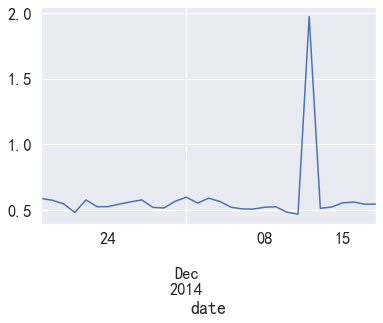

In [47]:
# 每用户平均消费次数
data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type=='4'].total.sum() / len(x.user_id.unique())).plot()

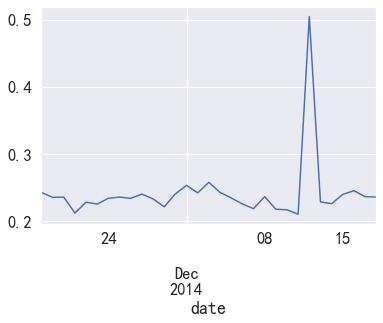

In [48]:
# 3.付费率 = 消费用户数 / 活跃用户数
data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type=='4'].total.count() / len(x.user_id.unique())).plot()

In [49]:
# 4.同一时间段用户消费次数分布
data_user_buy3 = data_user[data_user['behavior_type']=='4'].groupby(['user_id','date','hour'])['operation'].sum()

In [50]:
data_user_buy3.head()

user_id    date        hour
100001878  2014-11-18  20      1
           2014-11-24  20      3
           2014-11-25  13      2
           2014-11-26  16      2
                       21      1
Name: operation, dtype: int64

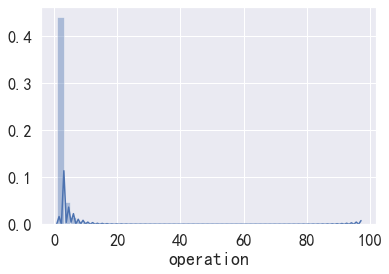

In [51]:
sns.distplot(data_user_buy3)

#### 3. 复购情况分析

In [52]:
# 复购率=复购行为用户数/有购买行为的用户总数
data_rebuy = data_user[data_user.behavior_type=='4'].groupby('user_id')['date'].apply(lambda x: len(x.unique())) # 每个用户不同购买日期的次数

In [53]:
data_rebuy[data_rebuy>=2].count() / data_rebuy.count() 

0.8717083051991897

In [62]:
# 间隔消费次数分布
data_day_buy4 = data_user[data_user.behavior_type=='4'].groupby('user_id').date.apply(lambda x: x.sort_values().diff(1).dropna())

In [63]:
data_day_buy4 = data_day_buy4.map(lambda x: x.days) 

In [66]:
data_day_buy4.reset_index().date.describe()

count    111319.000000
mean          1.351692
std           2.934267
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          30.000000
Name: date, dtype: float64

#### 4. 漏斗流失分析

In [67]:
data_user_count = data_user.groupby('behavior_type').size()

In [68]:
data_user_count

behavior_type
1    11550581
2      242556
3      343564
4      120205
dtype: int64

In [69]:
pv_all = data_user['user_id'].count()

In [70]:
# 从浏览到点击的流失率
(pv_all - data_user_count[0]) / pv_all

0.05762669632939993

In [71]:
# 从点击到加入购物车的流失率
(data_user_count[0] - data_user_count[2]) / data_user_count[0]

0.9702556953628566

In [72]:
# 从加入购物车到收藏的流失率
(data_user_count[2] - data_user_count[1]) / data_user_count[2]

0.29400053556251526

In [73]:
# 从收藏到购买的流失率分析
(data_user_count[1] - data_user_count[3]) / data_user_count[1]

0.5044237207077953

#### 5. 用户价值RFM分析

In [74]:
from datetime import datetime

In [75]:
recent_buy_time = data_user[data_user['behavior_type']=='4'].groupby('user_id')['date'].apply(lambda x: datetime(2014,12,20) - x.sort_values().iloc[-1])

In [76]:
recent_buy_time = recent_buy_time.reset_index().rename(columns={'date':'recent'})

In [77]:
recent_buy_time.recent = recent_buy_time.recent.apply(lambda x: x.days)

In [82]:
recent_buy_time.head()

,user_id,recent
0,100001878,2
1,100011562,4
2,100012968,2
3,100014060,2
4,100024529,4


In [79]:
# 统计每个用户消费频次
buy_freq = data_user[data_user['behavior_type']=='4'].groupby('user_id').date.count()

In [80]:
buy_freq = buy_freq.reset_index().rename(columns={'date':'freq'})

In [81]:
rfm = pd.merge(recent_buy_time, buy_freq, left_on='user_id', right_on='user_id')

In [83]:
rfm['recent_value'] = pd.qcut(rfm.recent,2,labels=['2','1'])

In [84]:
rfm['freq_value'] = pd.qcut(rfm.freq,2,labels=['1','2'])

In [85]:
rfm['rfm'] = rfm['recent_value'].str.cat(rfm['freq_value'])

In [87]:
rfm.head(10)

,user_id,recent,freq,recent_value,freq_value,rfm
0,100001878,2,36,2,2,22
1,100011562,4,3,2,1,21
2,100012968,2,15,2,2,22
3,100014060,2,24,2,2,22
4,100024529,4,26,2,2,22
5,100027681,6,48,2,2,22
6,100035725,2,4,2,1,21
7,100039408,31,1,1,1,11
8,100042340,2,3,2,1,21
9,10004287,20,14,1,2,12


**四种类型的用户分别是：22（重要价值用户），21（一般价值用户），12（重要发展用户），11（一般发展用户）**

- 22用户是重点关注用户，他们忠诚度高并且购买能力也高，是高价值用户
- 21用户忠诚度较高但是购买能力不足，建议可以适当给予折扣或者捆绑销售，增加用户购买频率
- 12用户说明忠诚度不高但是购买能力比较强，因为最近购买的天数距离比较久，所以需要多关注他们的购买习性做精准营销
- 11用户说明忠诚度低且购买能力低，因此可以减少关注

## 五、结论建议

- 通过对PV、UV的分析，可以发现在一天中不同时间段用户活跃度不同，因此在做商品推广和广告营销尽量选择活跃度比较高的时间段会有更好效果。
- 通过对用户的RFM模型分析，可以有效对不同用户进行不同群体划分，不同群体采用不同的个性化营销手段，能产生更好的效益。